In [ ]:
# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
df=spark.sql("show databases")
df.show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [ ]:
data = spark.read.csv('Electric_Vehicle_Population_Data.csv',inferSchema=True, header=True)

In [ ]:
import matplotlib.pyplot as plt
import pandas

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


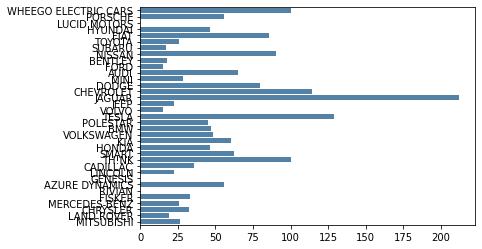

In [ ]:
import seaborn as sns
dfplot = data.groupby("Make").avg("Electric Range")
x=dfplot.toPandas()["Make"].values.tolist()
y=dfplot.toPandas()["avg(Electric Range)"].values.tolist()
sns.barplot(y,x, color='steelblue', label="Electric Vehicle Range")

In [ ]:
from pyspark.sql.types import IntegerType
data = data.withColumn("Model Year", data["Model Year"].cast(IntegerType()))
data = data.withColumn("Electric Vehicle Type", data["Electric Vehicle Type"].cast(IntegerType()))

In [ ]:
import findspark
findspark.init()
import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
import seaborn as sns
import matplotlib.pyplot as plt
spark = SparkSession.builder.getOrCreate()

In [ ]:
#Creating Table
data.registerTempTable('car')
sqlContext = SQLContext(spark)
#Running Query
df1 = sqlContext.sql("SELECT * from car").toPandas()

In [ ]:
df1.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-15-2e6bfec4ae5d>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df1.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
/usr/local/lib/python3.8/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.8/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Postal Code,Model Year,Electric Vehicle Type,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
Postal Code,1.00,-0.00,nan,0.00,0.00,-0.44,0.00,0.50
Model Year,-0.00,1.00,nan,-0.24,-0.23,0.01,-0.09,0.00
Electric Vehicle Type,nan,nan,nan,nan,nan,nan,nan,nan
Electric Range,0.00,-0.24,nan,1.00,0.07,0.03,0.02,0.00
Base MSRP,0.00,-0.23,nan,0.07,1.00,0.01,0.01,-0.00
Legislative District,-0.44,0.01,nan,0.03,0.01,1.00,-0.00,-0.11
DOL Vehicle ID,0.00,-0.09,nan,0.02,0.01,-0.00,1.00,0.00
2020 Census Tract,0.50,0.00,nan,0.00,-0.00,-0.11,0.00,1.00


In [ ]:
!pip install handyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 44 kB/s 
     |████████████████████████████████| 199 kB 57.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=d41e773016f4fa596a85194453c7380d6fdee8c8a6fdf5e68ecb8b374abcf529
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
from handyspark import *

In [ ]:
# Converting to handyspark CarData
hdf = data.toHandy()
hdf.show()

+----------+---------+----------+-----+-----------+----------+---------+--------------+---------------------+-------------------------------------------------+--------------+---------+--------------------+--------------+--------------------+--------------------+-----------------+
|VIN (1-10)|   County|      City|State|Postal Code|Model Year|     Make|         Model|Electric Vehicle Type|Clean Alternative Fuel Vehicle (CAFV) Eligibility|Electric Range|Base MSRP|Legislative District|DOL Vehicle ID|    Vehicle Location|    Electric Utility|2020 Census Tract|
+----------+---------+----------+-----+-----------+----------+---------+--------------+---------------------+-------------------------------------------------+--------------+---------+--------------------+--------------+--------------------+--------------------+-----------------+
|1N4BZ0CP9G|Snohomish| Arlington|   WA|      98223|      2016|   NISSAN|          LEAF|                 null|                             Clean Alternative..

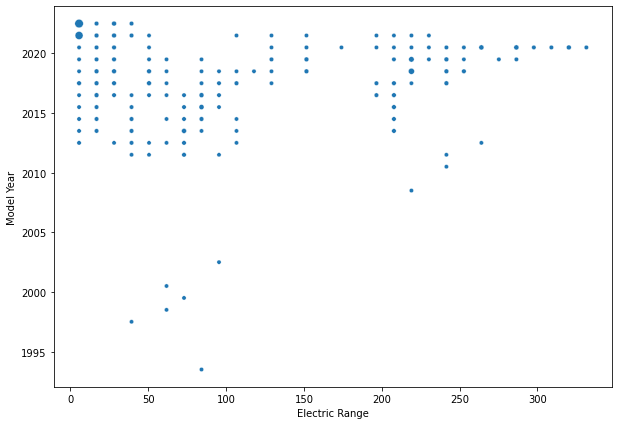

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
hdf.cols[['Electric Range', 'Model Year']].scatterplot(ax=ax)
plt.show()

In [ ]:
from pyspark.sql.types import IntegerType, StringType
data = data.withColumn("Model Year", data["Model Year"].cast(IntegerType()))
data = data.withColumn("Electric Vehicle Type", data["Electric Vehicle Type"].cast(StringType()))

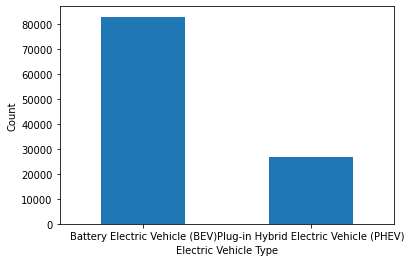

In [ ]:
data = data.toPandas()
data['Electric Vehicle Type'].value_counts().plot(kind='bar', xlabel='Electric Vehicle Type', ylabel='Count', rot=0)